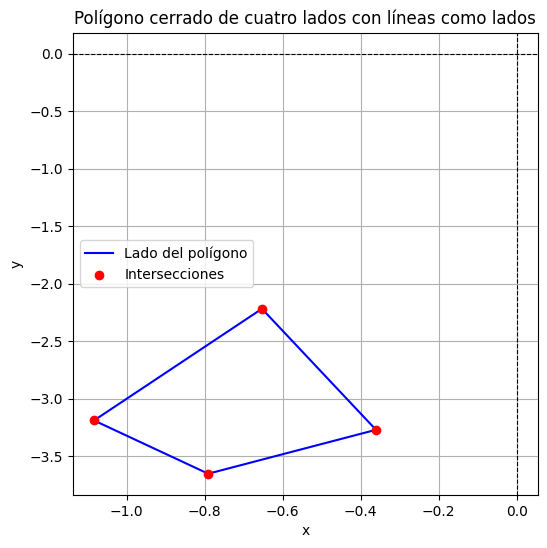

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull

# Definir las líneas como (pendiente, intercepto)
lineas = [
    (0.887869, -2.950066),  # Línea 1
    (-3.600509, -4.570070),  # Línea 2  # Línea 3
    (2.256779, -0.743571),  # Línea 4
    (-1.582634, -4.904379)
]

# Función para calcular la intersección de dos líneas
def interseccion(m1, b1, m2, b2):
    if m1 == m2:
        raise ValueError("Las líneas son paralelas y no se intersectan.")
    x = (b2 - b1) / (m1 - m2)
    y = m1 * x + b1
    return x, y

# Calcular las intersecciones de las líneas
puntos = [
    interseccion(*lineas[0], *lineas[1]),  # Línea 1 con Línea 2
    interseccion(*lineas[1], *lineas[2]),  # Línea 2 con Línea 3
    interseccion(*lineas[2], *lineas[3]),  # Línea 3 con Línea 4
    interseccion(*lineas[3], *lineas[0])   # Línea 4 con Línea 1
]

# Convertir los puntos en un arreglo numpy
puntos = np.array(puntos)

# Asegurar el orden correcto del polígono
hull = ConvexHull(puntos)
puntos_poligono = puntos[hull.vertices]

# Cerrar el polígono conectando el último punto con el primero
puntos_poligono = np.vstack([puntos_poligono, puntos_poligono[0]])

# Visualización del polígono con líneas
plt.figure(figsize=(6, 6))

# Dibujar las líneas del polígono
for i in range(len(puntos_poligono) - 1):
    plt.plot(
        [puntos_poligono[i, 0], puntos_poligono[i + 1, 0]],
        [puntos_poligono[i, 1], puntos_poligono[i + 1, 1]],
        color='blue', linewidth=1.5, label="Lado del polígono" if i == 0 else None
    )

# Dibujar los puntos de intersección
plt.scatter(puntos[:, 0], puntos[:, 1], color='red', zorder=5, label="Intersecciones")

# Configuración de los ejes y etiquetas
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Polígono cerrado de cuatro lados con líneas como lados")
plt.grid()
plt.show()
